In [15]:
from IPython.display import display, Math
import matplotlib.pyplot as plt
from collections import Counter
from math import *

def get_entropy(file_path : str):
    with open(file_path, "rb") as file:
        data = file.read()
    N = len(data)
    ns = Counter(data)
    H_byte = -sum((n/N)*log2(n/N) for n in ns.values())
    H_total = N*H_byte
    return N, H_byte, H_total

def handle(file_path : str):
    N, H_byte, H_total = get_entropy(file_path)
    display(Math(r"H_{\text{byte}} = %.2f \text{ бит}" % H_byte))
    display(Math(r"H_{\text{total}} = %.2f \text{ бит}" % H_total))
    display(Math(r"\text{Размер файла: } %d \text{ бит}" % (N*8)))

def draw_distribution(file_path : str):
    with open(file_path, "rb") as file:
        data = file.read()
    N = len(data)
    counts = [0 for _ in range(256)]
    for byte in data:
        counts[byte] += 1
    plt.bar(range(256), counts, width=1.0, edgecolor="black")
    plt.title(f"Распределение байтов в файле: {file_path}")
    plt.xlabel("Значение байта (0–255)")
    plt.ylabel("Количество вхождений")
    plt.show()

def show_bit_distribution(file_path: str):
    zeros = 0
    ones = 0
    with open(file_path, "rb") as f:
        data = f.read()
    for byte in data:
        ones_in_byte = bin(byte).count("1")
        ones += ones_in_byte
        zeros += 8 - ones_in_byte
    print(file_path + ":")
    print(f"    Количество 0: {zeros}")
    print(f"    Количество 1: {ones}")

Эта работа посвящена оценке влияния энтропии на сжатие файлов.

Будет измеряться энтропия до и после сжатия.

In [16]:
display(Math(r"\Large \text{Лицензия MIT}"))
handle("content/MIT_license.txt")
display(Math(r"\large \text{MIT\_license.7z}"))
handle("content/MIT_license.7z")
display(Math(r"\large \text{MIT\_license.zip}"))
handle("content/MIT_license.zip")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Посмотрим на распеределение байтов

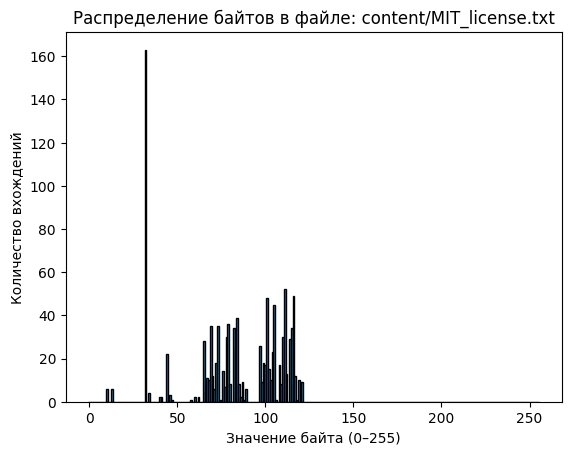

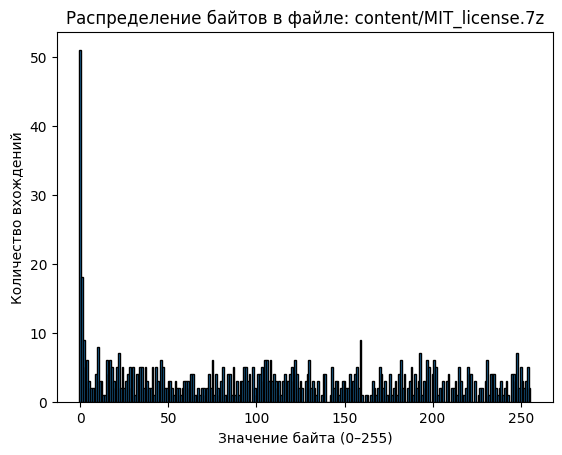

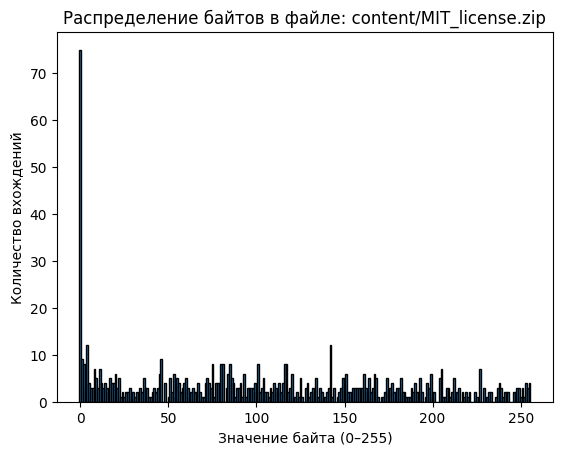

In [17]:
draw_distribution("content/MIT_license.txt")
draw_distribution("content/MIT_license.7z")
draw_distribution("content/MIT_license.zip")

Распределение битов

In [18]:
show_bit_distribution("content/MIT_license.txt")
show_bit_distribution("content/MIT_license.7z")
show_bit_distribution("content/MIT_license.zip")

content/MIT_license.txt:
    Количество 0: 4954
    Количество 1: 3606
content/MIT_license.7z:
    Количество 0: 3498
    Количество 1: 2958
content/MIT_license.zip:
    Количество 0: 3707
    Количество 1: 2797


Рассмотрим теперь растровое изображение в несжатом формате bmp.

![snail](content/snail.bmp)

In [19]:
display(Math(r"\Large \text{Улитка}"))
handle("content/snail.bmp")
display(Math(r"\large \text{snail.7z}"))
handle("content/snail.7z")
display(Math(r"\large \text{snail.zip}"))
handle("content/snail.zip")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

В случае с изображением получаем, что значение энтропии на байт после сжатия почти достигает максимального значения в 8 бит.

Распределение байтов:

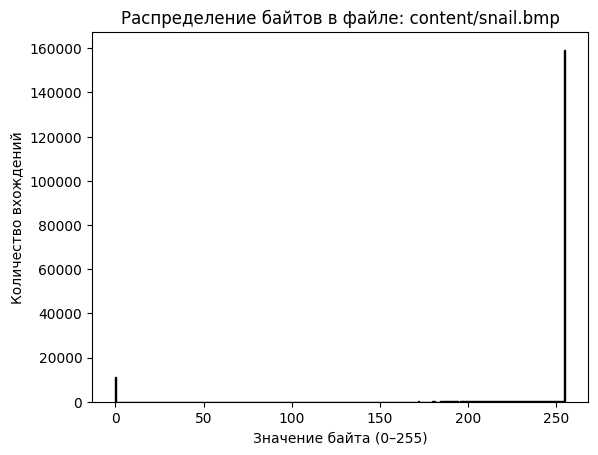

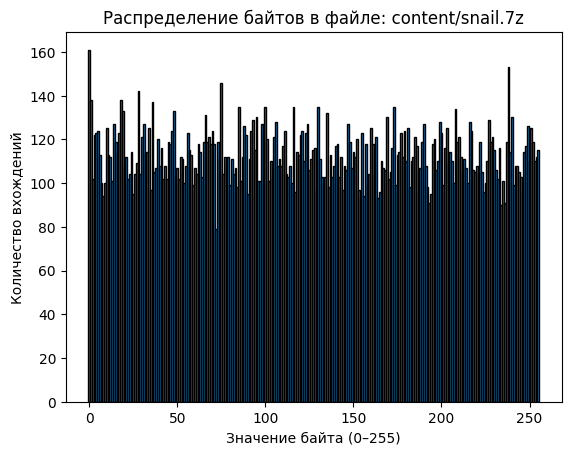

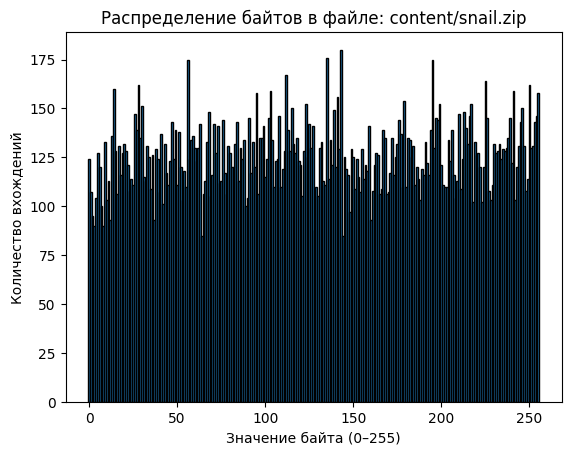

In [20]:
draw_distribution("content/snail.bmp")
draw_distribution("content/snail.7z")
draw_distribution("content/snail.zip")

Распределение битов:

In [21]:
show_bit_distribution("content/snail.bmp")
show_bit_distribution("content/snail.7z")
show_bit_distribution("content/snail.zip")

content/snail.bmp:
    Количество 0: 173962
    Количество 1: 1399366
content/snail.7z:
    Количество 0: 115688
    Количество 1: 115376
content/snail.zip:
    Количество 0: 126731
    Количество 1: 130605


Вывод:
1) Сжатие без потерь приводит к повышению энтропии.

2) Файлы с высокой энтропией сжимаются хуже.

3) Величина суммарной энтропии $H_{total}$ определяет минимальный размер сжатого файла.

4) При сжатии распределение приближается к равномерному.

5) Распределение байтов в сжатом тексте имеет пик в нуле.